In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer

In [56]:
a = ['a','b','c','d','b']

In [57]:
lb = LabelBinarizer()

In [58]:
lb.fit_transform(a)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [59]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [60]:
b=np.array(le.fit_transform(a)).reshape(-1,1)
b

array([[0],
       [1],
       [2],
       [3],
       [1]])

In [61]:
ohe.fit_transform(b).toarray()

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [152]:
dataframe = pd.read_csv('Data/Churn_Modelling.csv')

In [153]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


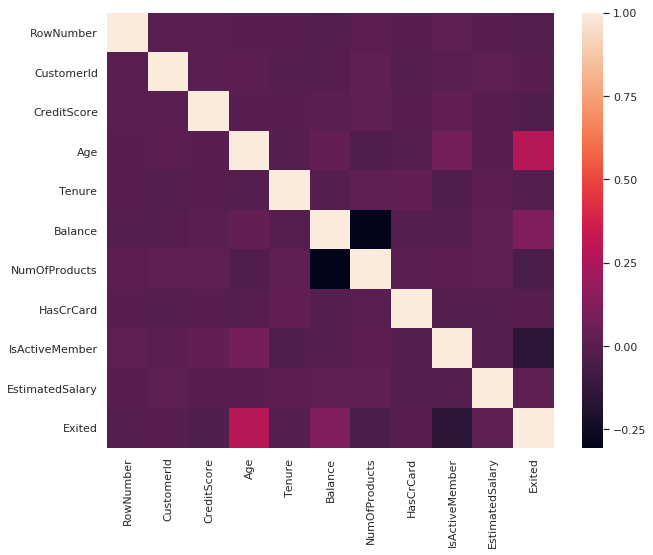

In [154]:
plt.figure(figsize=(10,8))
sns.heatmap(dataframe.corr())

In [155]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [156]:
dataframe.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [157]:
# Removing unwanted data
dataframe.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [158]:
# dataframe['Gender']= le.fit_transform(dataframe['Gender'])

In [159]:
dataframe.shape

(10000, 11)

In [160]:
dataframe.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

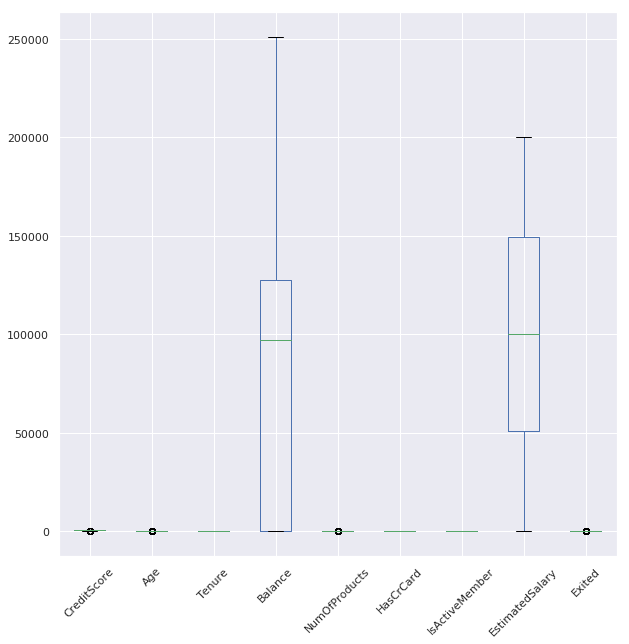

In [161]:
plt.figure(figsize=(10,10))
dataframe.boxplot(rot=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ac8abd748>,
      dtype=object)

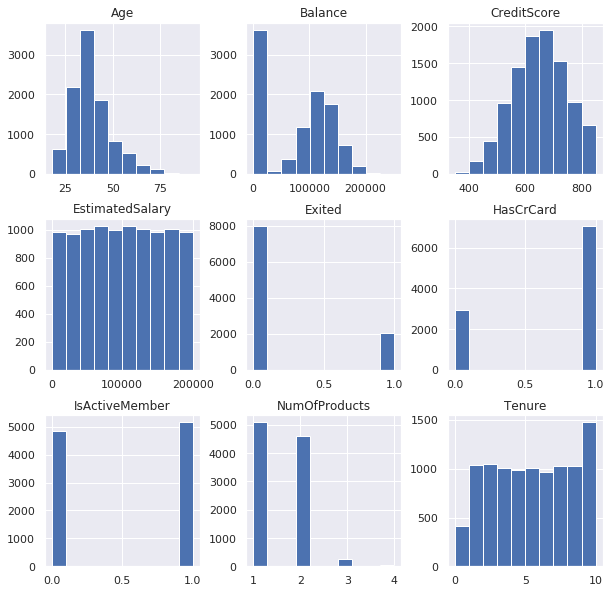

In [162]:
dataframe.hist(figsize=(10,10))

In [163]:
gender_label_encoder = LabelEncoder()
dataframe['Gender'] = gender_label_encoder.fit_transform(dataframe['Gender'])

In [164]:
a = dataframe

In [132]:
geog_label_encoder = LabelEncoder()
a['Geography'] = gender_label_encoder.fit_transform(dataframe['Geography'])

In [133]:
a.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7221,625,0,1,41,6,97663.16,2,1,0,57128.78,0


In [143]:
a.shape

(10000, 11)

In [148]:
geog_lb = LabelBinarizer()
b = geog_lb.fit_transform(a['Geography'])

In [174]:
b

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [171]:
names = dataframe['Geography'].unique()

In [170]:
names

array(['France', 'Spain'], dtype=object)

In [172]:
for i in range(0,len(names)-1):
    a[names[i]]=b[:,i]

In [173]:
a

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0
